# **Titanic - Machine Learning from Disaster**


# Table of Contents

* [1: Modules](#Modules)
* [2: Preparing Data](#PreparingData)
    * [2.1: Read Data](#ReadData)
    * [2.2: Missed Data Status](#MissedDataStatus)
    * [2.3: Data Labeling](#DataLabeling)
    * [2.3: Data Visualization](#DataVisualization)
    * [2.3: Imputer Design](#ImputerDesign)
    * [2.3: Encoder Design](#EncoderDesign)
    * [2.3: Drop Useless Features](#DropUselessFeatures)
* [3: Dimensionality Reduction](#DimensionalityReduction)
    * [3.1: Sensitivity Analysis](#SensitivityAnalysis)
        * [3.2: Decide on effective features](#DecideonEffectiveFeatures)
    * [3.3: UMAP Algorithm](#UMAPAlgorithm)
    
* [4: Machine Learning Design](#MachineLearning)
    * [4.1: Scaling](#Scaling)
    * [4.2: Cross Validation Prediction](#CrossValidationPrediction)
    * [4.3: Tuning Hyper Parameters](#TuningHyperParameters)
    * [4.4: Prediction](#Prediction)
    


<a class="anchor" id="Modules"></a>
### **Modules** 

In [14]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import math
from sklearn import svm, ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB,CategoricalNB,BernoulliNB,ComplementNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


### **Preparing Data** 
<a class="anchor" id="PreparingData"></a>


<a class="anchor" id="ReadData"></a>
#### **Read Data** 

In [15]:
# mdata = pd.read_csv('/kaggle/input/titanic/train.csv')
mdata = pd.read_csv('/kaggle/input/titanic/train.csv')
tdata = pd.read_csv('/kaggle/input/titanic/test.csv')
mdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
mdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a class="anchor" id="MissedDataStatus"></a>
#### **Missed Data Status** 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

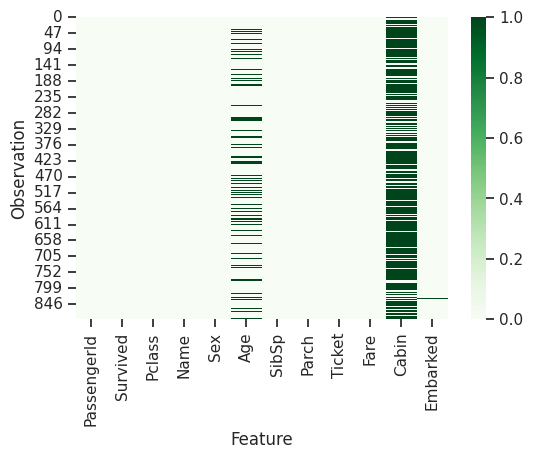

In [17]:
plt.figure(dpi=100)
sns.heatmap(mdata.isnull(), cmap="Greens")
plt.xlabel('Feature')
plt.ylabel('Observation')
mdata.isnull().sum()

<a class="anchor" id="ImputerDesign"></a>
#### **Imputer Design**

In [ ]:
# mean_age_men=mdata[mdata['Sex']=="male"]['Age'].mean()
# mean_age_women=mdata[mdata['Sex']=="female"]['Age'].mean()
# mdata.loc[(mdata.Age.isnull()) & (mdata['Sex']=="female"),'Age']=mean_age_women
# mdata.loc[(mdata.Age.isnull()) & (mdata['Sex']=="male"),'Age']=mean_age_men

# mean_age_men=tdata[tdata['Sex']=="male"]['Age'].mean()
# mean_age_women=tdata[tdata['Sex']=="female"]['Age'].mean()
# tdata.loc[(tdata.Age.isnull()) & (tdata['Sex']=="female"),'Age']=mean_age_women
# tdata.loc[(tdata.Age.isnull()) & (tdata['Sex']=="male"),'Age']=mean_age_men

<a class="anchor" id="DataLabeling"></a>
#### **Data Labeling**

In [18]:
def data_cleaner(data):
    data["Title"] = data["Name"].apply(lambda x: x[x.find(',') : x.find('.')][1:].strip())
    data["Title"] = data["Title"].apply(lambda x: 'Mr' if x == 'Mr' else x) # Mr
    data["Title"] = data["Title"].apply(lambda x: 'Miss' if x == 'Ms'or x == 'Mme' or x=='Mlle' else x) #Miss
    data["Title"] = data["Title"].apply(lambda x: 'Mrs' if x == 'Mrs' else x) #Mrs
    data["Title"] = data["Title"].apply(lambda x: 'Master' if x == 'Master' else x) #Master
    data["Title"] = data["Title"].apply(lambda x: 'Others' if x != 'Mr' and x != 'Miss' and x!= 'Mrs' and x!= 'Master' else x)

    data["Age_group"] = data["Age"].apply( lambda x: 'KIDs' if math.isnan(x)==False and x<=10 else x)
    data["Age_group"] = data["Age_group"].apply( lambda x: 'TEENs' if (type(x)!=str and math.isnan(x)==False and x<=20 and x >10) else x)
    data["Age_group"] = data["Age_group"].apply( lambda x: 'YOUNGs' if (type(x)!=str and math.isnan(x)==False and x<=40 and x >20) else x)
    data["Age_group"] = data["Age_group"].apply( lambda x: 'OLDs' if (type(x)!=str and math.isnan(x)==False and x >40) else x)
    
    data["FamSize"] = data["SibSp"]+data["Parch"]
    data["FamSizeLabel"] = data["FamSize"].apply( lambda x: 'Small' if int(x)<=2 else 'Large')

    data["FareInter"] = data["Fare"].apply(   
        lambda x: 'LowFare' if x<=7.910400 else ('MidFar' if float(x)>=7.910400 and float(x)<=14.454200 else "HighFare"))
                                  

    return data

data_cleaner(mdata)
data_cleaner(tdata)
mdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,FamSize,FamSizeLabel,FareInter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,YOUNGs,1,Small,LowFare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,YOUNGs,1,Small,HighFare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,YOUNGs,0,Small,MidFar
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,YOUNGs,1,Small,HighFare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,YOUNGs,0,Small,MidFar


<a class="anchor" id="DataVisualization"></a>
#### **Data Visualization**

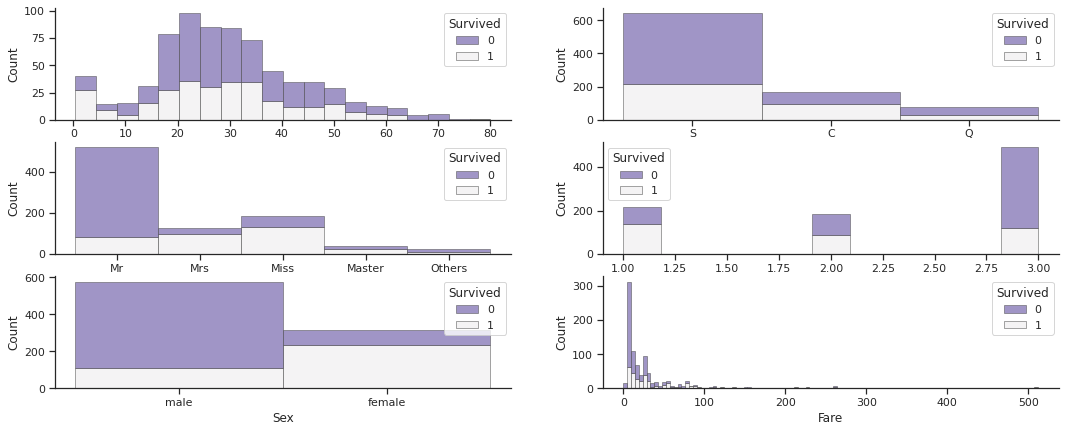

In [19]:
xcol = ["Age","Title", "Sex","Embarked", "Pclass","Fare" ]
huecol = "Survived"
r = 3
c = 2
def mybar(data, xcol, huecol, r, c):
    i = -1
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(r,c,figsize=(18, 7))
    sns.despine(f)
    for col in xcol:
        i+=1
        y = lambda y: int(0) if y<3 else int(1)
        x = lambda x: x if x<3 else int(x-3)
        sns.histplot( data, x=col, hue=huecol, multiple="stack", palette="light:m_r",
            edgecolor=".3", linewidth=.5, log_scale=False,ax = ax[x(i), y(i)])
mybar(mdata, xcol, huecol, r, c)


<a class="anchor" id="EncoderDesign"></a>
#### **Encoder Design**

In [ ]:
# Encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

def titanic_encoder(data):
    enc.fit(data[["Embarked"]])
    data[["S","Q","C"]] = \
        pd.DataFrame(enc.transform(data[["Embarked"]]).toarray())
    #----
    enc.fit(data[["Sex"]])
    data[["F","M"]] = \
        pd.DataFrame(enc.transform(data[["Sex"]]).toarray())
    #----
    #----
    enc.fit(data[["Age_group"]])
    data[["Age1","Age2","Age3","Age4"]] = \
        pd.DataFrame(enc.transform(data[["Age_group"]]).toarray())
    #----
    enc.fit(mdata[["FamSizeLabel"]])
    data[["Small","Large"]] = \
        pd.DataFrame(enc.transform(data[["FamSizeLabel"]]).toarray())
    #----
    enc.fit(mdata[["Pclass"]])
    data[["C1","C2","C3"]] = \
        pd.DataFrame(enc.transform(data[["Pclass"]]).toarray())
    #----
    enc.fit(mdata[["FareInter"]])
    data[["F1","F2","F3"]] = \
        pd.DataFrame(enc.transform(data[["FareInter"]]).toarray())
    return data
titanic_encoder(mdata)
titanic_encoder(tdata)
mdata.head()

<a class="anchor" id="DropUselessFeatures"></a>
#### **Drop Useless Features**
There are some useless columns like "Name", "Cabin" that their information does not contribute in making a model. Moreover those columns whose data are encoded to binaries are also removed. Because I am going to work with the binary data. 

In [ ]:
col = ["Age","PassengerId","Sex","Name","Cabin","Ticket","Embarked","Title","FamSize","SibSp","Parch","Age_group","Pclass","FamSizeLabel",'Fare',"FareInter"]
mdata_drp = mdata.drop(col,axis = 1)
tdata_drp = tdata.drop(col,axis = 1)


<a class="anchor" id="DimensionalityReduction"></a>
## **Dimensionality Reduction**

<a class="anchor" id="SensitivityAnalysis"></a>
#### **Sensitivity Analysis**

In [ ]:
myheatmap=plt.figure(figsize=(25,8))
sns.heatmap(mdata_drp.corr(),annot=True)
plt.title("A",loc='left')

<a class="anchor" id="DecideonEffectiveFeatures"></a>
#### **Decide on Effective Features**

In [ ]:
var_col =  ["S","C","F","M","Age1","Age2","Age4","Small","Large","C1","C2","C3",'F1',"F2","F3"]
fit_col = "Survived"
mdata_drp[var_col].head()

<a class="anchor" id="UMAPAlgorithm"></a>
#### **UMAP Algorithm**
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.

In [ ]:
import umap
trans = umap.UMAP(n_neighbors=50, random_state=3, min_dist=0.3,
                      metric='correlation').fit(mdata_drp[var_col])
plt.figure(figsize = (10,5))
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 10, c=[sns.color_palette()[x] for x in mdata_drp[fit_col]])
plt.xlabel("Dim1")
plt.ylabel("Dim2")

<a class="anchor" id="UMAPAlgorithm"></a>
#### **PCA Algorithm**

In [ ]:
# pca = PCA(n_components=10)
# red_x = pca.fit_transform(mdata_drp[var_col])
# scaler= StandardScaler()
# red_x_std = scaler.fit_transform(red_x)
scaler = MinMaxScaler()
x_std = scaler.fit_transform(mdata_drp[var_col])

Note: UMAP has no good space reduction and the boundaries are not clear. So, I used only sensitivity analysis to drop less effective parameter.

<a class="anchor" id="MachineLearning"></a>
## **Machine Learning**

<a class="anchor" id="Scaling"></a>
#### **Split Data**
Note: All features have been encoded between 0 and 1, so the scaling data has not been employed here.

In [ ]:
y = mdata_drp[fit_col].values
y=np.reshape(y,(len(y),))
x_train, x_test, y_train, y_test = train_test_split(x_std, y,
                                                    train_size=0.85,
                                                    random_state=0)


<a class="anchor" id="CrossValidationPrediction"></a>
#### **Cross Validation Prediction**
Note: I am evaluating four different classification mehods.

In [ ]:
estimators = [svm.SVC(),
              ensemble.RandomForestClassifier(),
              KNeighborsClassifier(), SGDClassifier(),LogisticRegression()]

for esti in estimators:
    y_pred = cross_val_predict(esti,x_train,y_train,cv=3)
    print(f"\nClassification Report for {esti}:")
    print("Accuracy= ", accuracy_score(y_pred, y_train))
    print(confusion_matrix(y_pred, y_train))
    print(classification_report(y_pred,y_train))
        

<a class="anchor" id="TuningHyperParameters"></a>
#### **Tuning Hyper Parameters**

In [ ]:
# Parameters of support vector machine

kernel=['poly','rbf','sigmoid']
C= [1,5,10,20,50,100,200,500,1000]
degree = [1,2,3,4]
gamma = ['scale', 'auto']
distributions = {
    "kernel": kernel,
    "C": C,
    "degree":degree,
    "gamma" : gamma,
}

iestimator = RandomizedSearchCV(
    svm.SVC(),
    param_distributions=distributions,
    n_iter = 30
)

iestimator_dict = iestimator.fit(x_train,y_train)
best_config= iestimator_dict.best_estimator_
best_y_pred = cross_val_predict(best_config, x_train,y_train, cv=3)
print("Accuracy= ", accuracy_score(best_y_pred, y_train))
print(confusion_matrix(best_y_pred, y_train))
print(classification_report(best_y_pred,y_train))

In [ ]:
# Parameters of random forest

n_estimators= [50,100,500]
criterion = ["gini", "entrop", "log_loss"]
max_depth = [10,50,100]
min_samples_split = [5,10,20,40]
min_samples_leaf = [5,10,20,40]
max_features = ["sqrt","log2"]
distributions = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth":max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf"  : min_samples_leaf,
    "max_features":max_features,
    
}

iestimator = RandomizedSearchCV(
    ensemble.RandomForestClassifier(),
    param_distributions=distributions,
    n_iter = 30
)

iestimator_dict = iestimator.fit(x_train,y_train)
best_config= iestimator_dict.best_estimator_
best_y_pred = cross_val_predict(best_config, x_train,y_train, cv=3)
print("Accuracy= ", accuracy_score(best_y_pred, y_train))
print(confusion_matrix(best_y_pred, y_train))
print(classification_report(best_y_pred,y_train))

<a class="anchor" id="Prediction"></a>
#### **Prediction**

In [ ]:
tdata_final = pd.DataFrame([tdata['PassengerId'],best_config.predict(tdata_drp[var_col])],index = ['PassengerId','Survived']).T
tdata_final.to_csv('./result.csv')

In [ ]:
tdata_final